# ラプラス固有写像
教師なしで非線形の次元削減をラプラス固有写像を用いて行う．  
類似度行列の生成には最近傍類似度を用いる

In [1]:
import numpy as np
from scipy import linalg
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# データ生成
def data_generation(n=1000):
    a = 3. * np.pi * np.random.rand(n)
    x = np.stack([a * np.cos(a), 30. * np.random.random(n), a * np.sin(a)], axis=1)
    return a, x

In [3]:
# 実行関数
def LapEig(x, d=2):
    knn = 10
    x = x - np.mean(x, axis=0)
    
    #近傍行列を求める（最近傍類似度行列）
    _W = np.sum((x[:, None] - x[None]) ** 2, axis=2)
    w_arg = np.argsort(_W,axis=1)[:,1:knn+1]
    W = np.zeros((len(x), len(x)))
    for i in range(len(x)):
        W[i,w_arg[i]] = 1
        W[w_arg[i],i] = 1

    _d = np.sum(W,axis=1)
    D = np.diag(_d)
    L = D-W
    w, v = linalg.eig(L, D) # 一般固有値問題を解く
    v = v[:,np.argsort(w)]
    w = w[np.argsort(w)]
    
    return v[:,1:d+1]

In [4]:
# 可視化(3次元)
def visualize(x, z, a):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.scatter3D(x[:, 0], x[:, 1], x[:, 2], c=a, marker='o')
    ax = fig.add_subplot(1, 2, 2)
    ax.scatter(z[:, 1], z[:, 0], c=a, marker='o')
    fig.savefig("result/lap_eig.png")
    fig.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


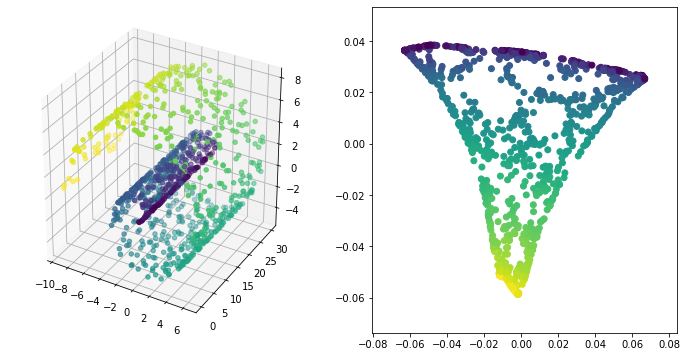

In [5]:
n = 1000
a, x = data_generation(n)
z = LapEig(x)
visualize(x, z, a)

左が元のデータで，渦巻き状のデータ分布をしている．  
これをラプラス固有写像を用いて2次元に次元削減すると，近傍にある点同士が近くなるように射影される．  
右の結果を見ると渦巻き状の分布に沿って射影軸が求められていることがわかる．  